# Импортируем библиотеки и список файлов для работы

In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_names = ['set_1.csv', 'set_2.csv', 'set_3.csv']

# Функция для загрузки данных из файла

In [167]:
def load_data(file_path):
    try:
        data = pd.read_csv(file_path, header=None).values.flatten()
        return data
    except FileNotFoundError:
        print(f"Ошибка: Файл {file_path} не найден.")
        return None
    except Exception as e:
        print(f"Ошибка при загрузке файла {file_path}: {e}")
        return None

# Функция для расчета математического ожидания и дисперсии

In [168]:
def calculate_mean_and_variance(data):
    if data is None or len(data) == 0:
        return None, None
    mean = np.mean(data)
    variance = np.var(data)
    return mean, variance

# Функция для удаления выбросов методом IQR

In [169]:
def remove_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_data = data[(data >= lower_bound) & (data <= upper_bound)]
    return filtered_data

# Функция, рассчитывающая количество интервалов для гистограммы по правилу Стерджеса.

In [170]:
def calculate_bins_sturges(data):
    n = len(data)
    if n > 0:
        return int(1 + np.log2(n))
    else:
        return 1

# Функция построения гистограммы с нормировкой на 100%.

In [171]:
def plot_histogram(data, title, mean=None, variance=None):
    bins = calculate_bins_sturges(data)
    if title == "Гистограмма очищенных данных для файла set_1.csv":
        bins = 8
    plt.hist(data, bins=bins, density=True, color='blue', alpha=0.7, edgecolor='black')
    plt.title(title)
    plt.xlabel("Значения")
    plt.ylabel("Частота")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    if mean is not None:
        plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Математическое ожидание: {mean:.2f}')
    if variance is not None:
        std_dev = variance ** 0.5
        plt.axvline(mean + std_dev, color='orange', linestyle='dotted', linewidth=2, label=f'Сигма (mean + std): {mean + std_dev:.2f}')
        plt.axvline(mean - std_dev, color='orange', linestyle='dotted', linewidth=2, label=f'Сигма (mean - std): {mean - std_dev:.2f}')

    plt.legend()
    plt.show()

 1. **Загрузка данных**
 2. **Hасчет статистик для обычный данных и данных после удаления выбросов**
 3. **Построение графиков обоих данных с нормировкой в 100%**

Файл set_1.csv:
  Математическое ожидание: 3.4408
  Дисперсия: 10.0482


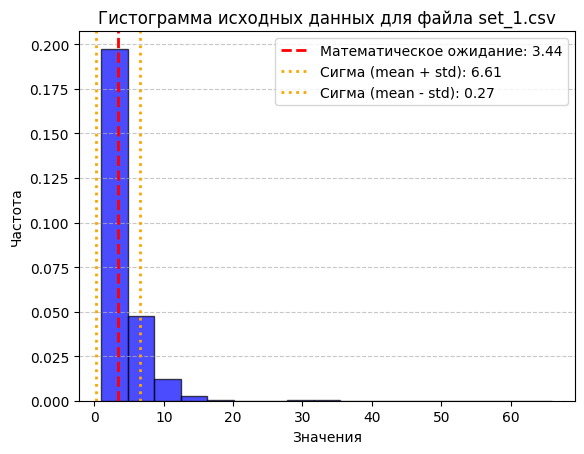

После удаления выбросов:
  Математическое ожидание: 2.8508
  Дисперсия: 3.6321



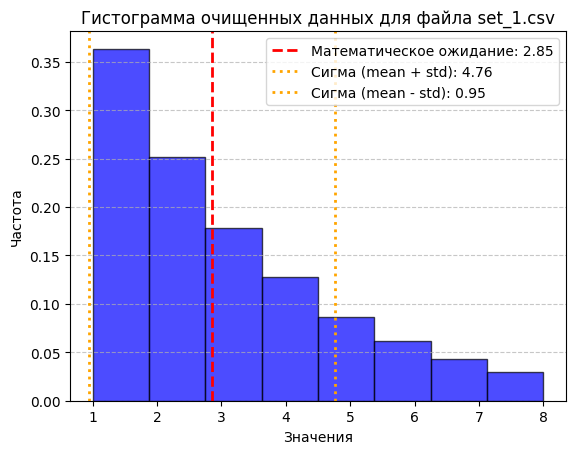

Файл set_2.csv:
  Математическое ожидание: 16.2433
  Дисперсия: 10927.4046


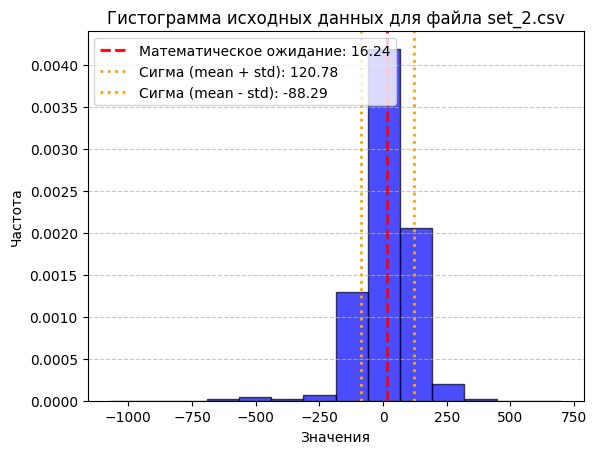

После удаления выбросов:
  Математическое ожидание: 19.5122
  Дисперсия: 6846.9818



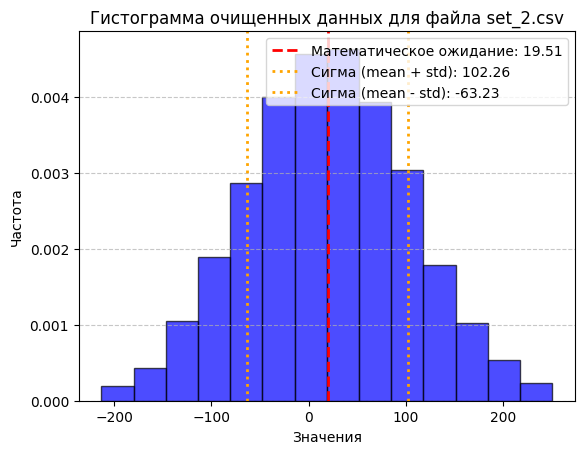

Файл set_3.csv:
  Математическое ожидание: 0.1245
  Дисперсия: 0.0256


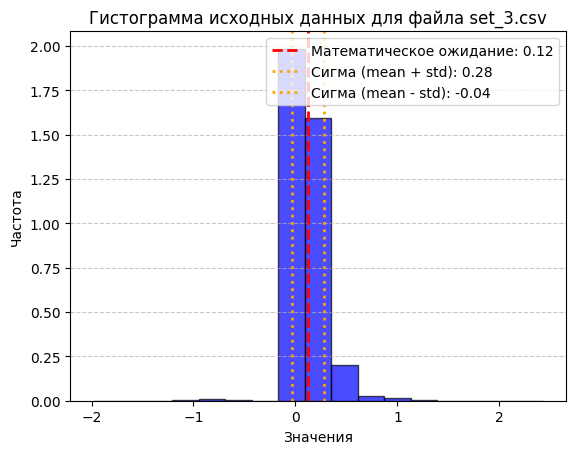

После удаления выбросов:
  Математическое ожидание: 0.1055
  Дисперсия: 0.0080



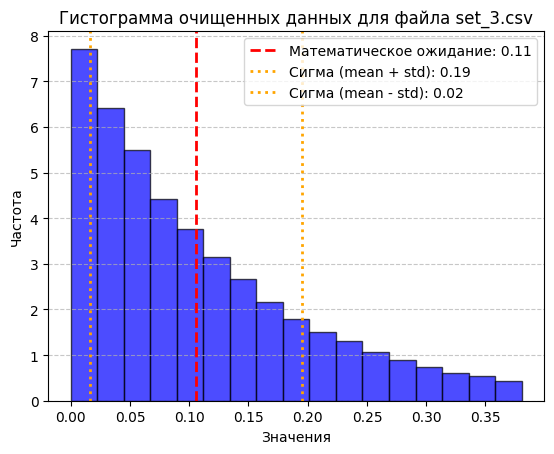

In [172]:
for i, file_path in enumerate(file_names):
    data = load_data(file_path)
    if data is not None:
        mean, variance = calculate_mean_and_variance(data)
        if mean is not None and variance is not None:
            print(f"Файл {file_path}:")
            print(f"  Математическое ожидание: {mean:.4f}")
            print(f"  Дисперсия: {variance:.4f}")
            
            plot_histogram(data, f"Гистограмма исходных данных для файла {file_path}", mean, variance)
        else:
            print(f"Файл {file_path}: Невозможно рассчитать статистики.")
        data_cleaned = remove_outliers_iqr(data)
        mean_cleaned, variance_cleaned = calculate_mean_and_variance(data_cleaned)
        if mean_cleaned is not None and variance_cleaned is not None:
            print("После удаления выбросов:")
            print(f"  Математическое ожидание: {mean_cleaned:.4f}")
            print(f"  Дисперсия: {variance_cleaned:.4f}\n")
            
            plot_histogram(data_cleaned, f"Гистограмма очищенных данных для файла {file_path}", mean_cleaned, variance_cleaned)
        else:
            print(f"Невозможно посчитать данные после удаления выбросов.")

# Реализация функций распределения 

In [173]:
def geometric_distribution(p, k):
    """Геометрическое распределение: P(X=k) = (1-p)^(k-1) * p"""
    return (1 - p) ** (k - 1) * p

def binomial_distribution(n, k, p):
    """Биномиальное распределение: P(X=k) = C(n, k) * p^k * (1-p)^(n-k)"""
    from math import comb
    return comb(n, k) * (p ** k) * ((1 - p) ** (n - k))

def poisson_distribution(lambd, k):
    """Распределение Пуассона: P(X=k) = (lambd^k * e^(-lambd)) / k!"""
    from math import exp, factorial
    return (lambd ** k * exp(-lambd)) / factorial(k)

def uniform_distribution(x, a, b):
    """Равномерное распределение: P(X=x) = 1/(b-a) для a <= x <= b"""
    if a <= x <= b:
        return 1 / (b - a)
    else:
        return 0

def normal_distribution(x, mean, std_dev):
    """Нормальное распределение: P(X=x) = (1/(std_dev * sqrt(2 * pi))) * exp(-0.5 * ((x - mean) / std_dev)^2)"""
    return (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_dev) ** 2)

def exponential_distribution(x, lambd):
    """Экспоненциальное распределение: P(X=x) = lambd * exp(-lambd * x) для x >= 0"""
    if x >= 0:
        return lambd * np.exp(-lambd * x)   

# Реализация алгоритмов построения этих распределений

In [174]:
def plot_histogram_with_distributions(data, title, mean, variance, nameDistribution = ''):
    bins = calculate_bins_sturges(data)
    if title == "Гистограмма измененных данных для файла set_1.csv":
        bins = 8
    plt.hist(data, bins=bins, density=True, alpha=0.6, color='blue', edgecolor='black', label='Эмпирические данные')
    x = np.linspace(min(data), max(data), 70)
    try:
        # Нормальное распределение
        if nameDistribution == "normal":
            std_dev = variance ** 0.5
            if std_dev == 0:
                raise ValueError("Стандартное отклонение равно нулю. Нормальное распределение невозможно.")
            y_normal = [normal_distribution(xi, mean, std_dev) for xi in x]
            plt.plot(x, y_normal, 'r-', label='Нормальное')
            # Экспоненциальное распределение
        elif nameDistribution == "exponential":
            if mean <= 0:
                raise ValueError("Среднее значение должно быть положительным для экспоненциального распределения.")
            lambda_exp = (1 / mean)
            y_exp = [exponential_distribution(xi, lambda_exp) for xi in x]
            plt.plot(x, y_exp, 'r--', label='Экспоненциальное')
            # Равномерное распределение
        elif nameDistribution == "uniform":
            a, b = min(data), max(data)
            if a >= b:
                raise ValueError("Границы распределения совпадают. Равномерное распределение невозможно.")
            y_uniform = [uniform_distribution(xi, a, b) for xi in x]
            plt.plot(x, y_uniform, 'm:', label='Равномерное')
        elif nameDistribution == "geometric":
            if mean <= 1:
                raise ValueError("Среднее значение должно быть больше 1 для геометрического распределения.")
            p = 1 / mean
            k_values = range(1, int(max(data)) + 1)  # Используем дискретные значения
            y_geom = [geometric_distribution(p, k) for k in k_values]
            plt.bar(k_values, y_geom, alpha=0.6, color='green', label='Геометрическое', width=0.5)
        else:
            raise ValueError(f"Неизвестное распределение: {nameDistribution}")
    except ValueError as e:
        print(f"Ошибка: {e}")
    plt.title(title)
    plt.xlabel('Значение')
    plt.ylabel('Плотность вероятности')
    plt.legend()
    plt.grid(True)
    plt.show()

# Наложить теоретичесое распределения на соответствующие гистограммы

Файл set_1.csv:


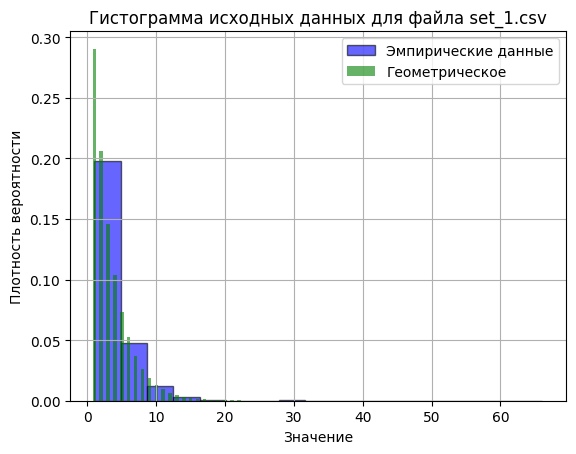

После удаления выбросов:


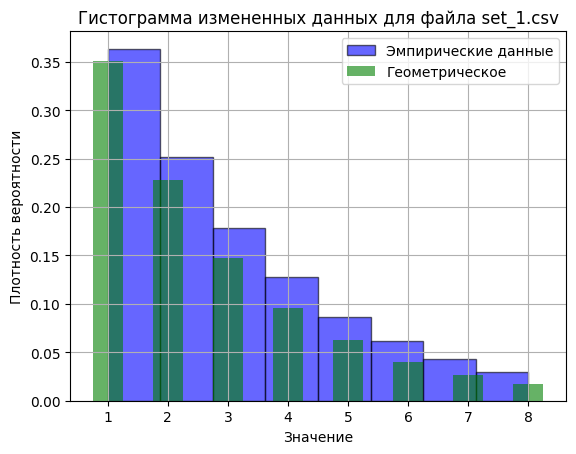

Файл set_2.csv:


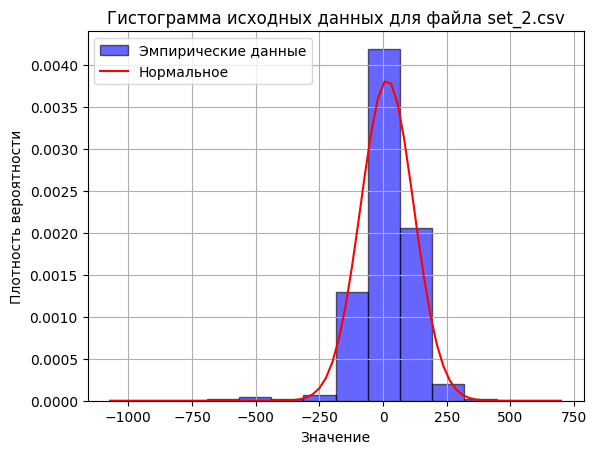

После удаления выбросов:


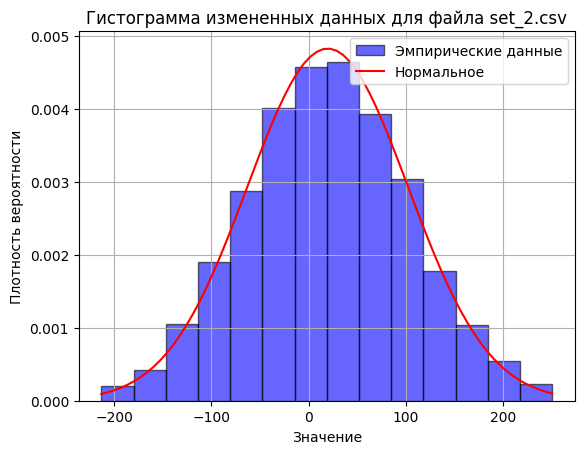

Файл set_3.csv:


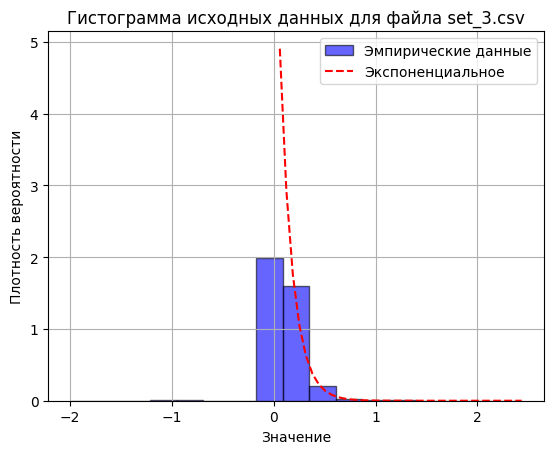

После удаления выбросов:


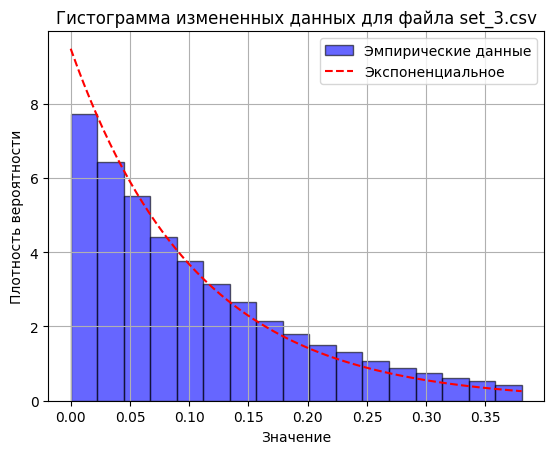

In [175]:
for i, file_path in enumerate(file_names):
    data = load_data(file_path)
    nameDistribution = ''
    if data is not None:
        mean, variance = calculate_mean_and_variance(data)
        if mean is not None and variance is not None:
            print(f"Файл {file_path}:")
            if i == 0:
                nameDistribution = "geometric"
            elif i == 1:
                nameDistribution = "normal"
            elif i == 2:
                nameDistribution="exponential"
            plot_histogram_with_distributions(data, f"Гистограмма исходных данных для файла {file_path}", mean, variance, nameDistribution)
        else:
            print(f"Файл {file_path}: Невозможно рассчитать статистики.")
        
        data_cleaned = remove_outliers_iqr(data)
        mean_cleaned, variance_cleaned = calculate_mean_and_variance(data_cleaned)
        if mean_cleaned is not None and variance_cleaned is not None:
            print("После удаления выбросов:")
            plot_histogram_with_distributions(data_cleaned, f"Гистограмма измененных данных для файла {file_path}", mean_cleaned, variance_cleaned, nameDistribution)
        else:
            print(f"Невозможно посчитать данные после удаления выбросов.")
